In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [9]:
cursor.execute("DROP TABLE IF EXISTS sales")  # Clear previous data for demo repeatability
cursor.execute("""
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL,
        date TEXT
    )
""")

In [10]:
sales_data = [
    ('Widget', 10, 2.5, '2025-09-01'),
    ('Widget', 7, 2.5, '2025-09-03'),
    ('Widget', 4, 2.5, '2025-09-10'),
    ('Gadget', 5, 3.0, '2025-09-01'),
    ('Gadget', 8, 3.0, '2025-09-07'),
    ('Gadget', 3, 3.0, '2025-09-15'),
    ('Doodad', 6, 4.0, '2025-09-02'),
    ('Doodad', 2, 4.0, '2025-09-12'),
    ('Doodad', 7, 4.0, '2025-09-20'),
    ('Thingamajig', 9, 5.5, '2025-09-03'),
    ('Thingamajig', 3, 5.5, '2025-09-06'),
    ('Thingamajig', 5, 5.5, '2025-09-11'),
    ('Whatchamacallit', 4, 6.0, '2025-09-05'),
    ('Whatchamacallit', 6, 6.0, '2025-09-14'),
    ('Gizmo', 8, 7.0, '2025-09-04'),
    ('Gizmo', 4, 7.0, '2025-09-10'),
    ('Gizmo', 5, 7.0, '2025-09-19'),
]

cursor.executemany("INSERT INTO sales (product, quantity, price, date) VALUES (?, ?, ?, ?)", sales_data)
conn.commit()

In [11]:
query = """
    SELECT
        product,
        strftime('%Y-%m', date) AS month,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product, month
    ORDER BY month, product
"""
df = pd.read_sql_query(query, conn)

In [12]:
print("Sales Summary by Product and Month:")
print(df)

Sales Summary by Product and Month:
           product    month  total_qty  revenue
0           Doodad  2025-09         15     60.0
1           Gadget  2025-09         16     48.0
2            Gizmo  2025-09         17    119.0
3      Thingamajig  2025-09         17     93.5
4  Whatchamacallit  2025-09         10     60.0
5           Widget  2025-09         21     52.5


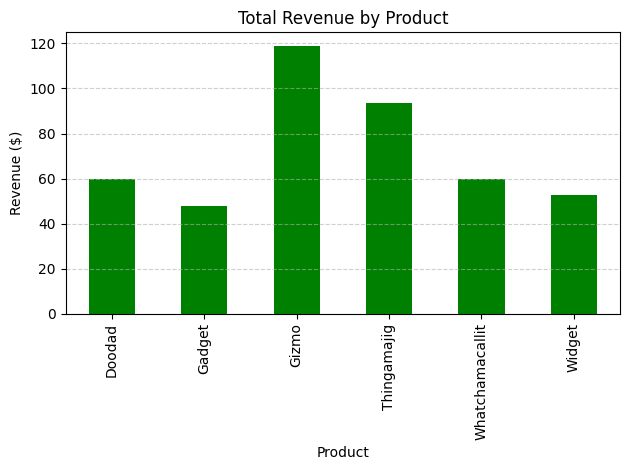

In [13]:
summary_by_product = df.groupby('product').agg({'revenue': 'sum'}).reset_index()

summary_by_product.plot(kind='bar', x='product', y='revenue', legend=False, color='green')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [15]:
df.to_csv("sales_summary.csv", index=False)
print("✅ Sales summary saved as 'sales_summary.csv'")

✅ Sales summary saved as 'sales_summary.csv'


In [16]:
from google.colab import files
files.download("sales_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>